<a href="https://colab.research.google.com/github/jpforol/RNA_IFES/blob/main/aula07_atividade_reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((8982,), (8982,), (2246,), (2246,))

In [142]:
train_data[0:1], train_labels[0:1]

(array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])],
       dtype=object),
 array([3]))

In [143]:
def decode_words(word_index, sentence):
    reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()]
    )
    return " ".join(
        [reverse_word_index.get(i-3, "?") for i in sentence]
    )
decode_words(reuters.get_word_index(), train_data[0])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [144]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train.shape, x_test.shape, x_train[0:3,:50]

((8982, 10000),
 (2246, 10000),
 array([[0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
         1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
         1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
         1., 1.],
        [0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
         1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         1., 1.],
        [0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
         0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
         1., 0.]]))

In [145]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)
x_train = tokenizer.sequences_to_matrix(train_data)
x_test = tokenizer.sequences_to_matrix(test_data)
x_train.shape, x_test.shape, x_train[0:3,:50]

((8982, 10000),
 (2246, 10000),
 array([[0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
         1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
         1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
         1., 1.],
        [0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
         1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         1., 1.],
        [0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
         0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
         1., 0.]]))

In [148]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

y_train.shape, y_test.shape

((8982, 46), (2246, 46))

In [149]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

y_train.shape, y_test.shape

((8982, 46), (2246, 46))

In [150]:
from keras.engine.training import optimizer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [153]:
n_val = 1000
x_val = x_train[:n_val]
partial_x_train = x_train[n_val:]
y_val = y_train[:n_val]
partial_y_train = y_train[n_val:]
x_val.shape, partial_x_train.shape, y_val.shape, partial_y_train.shape

((1000, 10000), (7982, 10000), (1000, 46), (7982, 46))

In [154]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 5s 285ms/step - loss: 2.0481 - accuracy: 0.5291 - val_loss: 1.3361 - val_accuracy: 0.6920
Epoch 2/20
16/16 [==============================] - 5s 348ms/step - loss: 1.1178 - accuracy: 0.7412 - val_loss: 1.0638 - val_accuracy: 0.7480
Epoch 3/20
16/16 [==============================] - 4s 258ms/step - loss: 0.8061 - accuracy: 0.8107 - val_loss: 0.9655 - val_accuracy: 0.7780
Epoch 4/20
16/16 [==============================] - 4s 277ms/step - loss: 0.5586 - accuracy: 0.8741 - val_loss: 1.0659 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 5s 311ms/step - loss: 0.4305 - accuracy: 0.9013 - val_loss: 0.8105 - val_accuracy: 0.8300
Epoch 6/20
16/16 [==============================] - 4s 252ms/step - loss: 0.3111 - accuracy: 0.9262 - val_loss: 0.8196 - val_accuracy: 0.8240
Epoch 7/20
16/16 [==============================] - 5s 303ms/step - loss: 0.2580 - accuracy: 0.9345 - val_loss: 0.8332 - val_accuracy: 0.8180
Epoch 

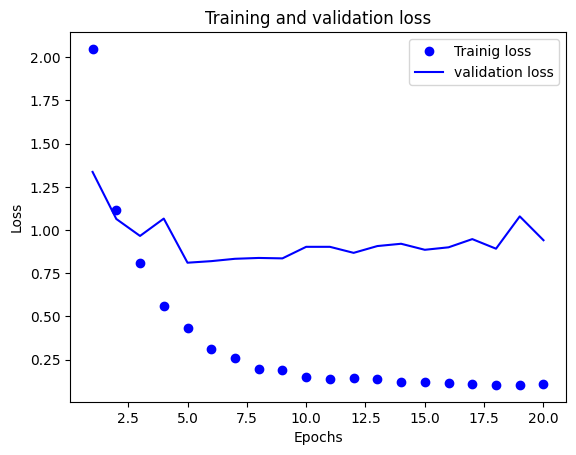

In [155]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Trainig loss")
plt.plot(epochs, val_loss_values, "b", label="validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

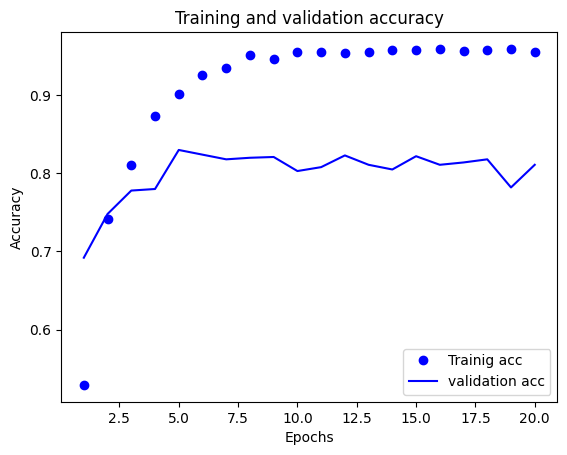

In [156]:
import matplotlib.pyplot as plt
history_dict = history.history
accuracy_values = history_dict["accuracy"]
val_accuracy_values = history_dict["val_accuracy"]
epochs = range(1, len(accuracy_values)+1)
plt.plot(epochs, accuracy_values, "bo", label="Trainig acc")
plt.plot(epochs, val_accuracy_values, "b", label="validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [157]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=8, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/8
16/16 [==============================] - 6s 371ms/step - loss: 0.1014 - accuracy: 0.9577 - val_loss: 0.9518 - val_accuracy: 0.8070
Epoch 2/8
16/16 [==============================] - 4s 247ms/step - loss: 0.1028 - accuracy: 0.9551 - val_loss: 0.9223 - val_accuracy: 0.8090
Epoch 3/8
16/16 [==============================] - 4s 249ms/step - loss: 0.0956 - accuracy: 0.9583 - val_loss: 0.8991 - val_accuracy: 0.8150
Epoch 4/8
16/16 [==============================] - 5s 339ms/step - loss: 0.0962 - accuracy: 0.9567 - val_loss: 0.9502 - val_accuracy: 0.8100
Epoch 5/8
16/16 [==============================] - 4s 248ms/step - loss: 0.0934 - accuracy: 0.9588 - val_loss: 0.9200 - val_accuracy: 0.8140
Epoch 6/8
16/16 [==============================] - 4s 249ms/step - loss: 0.0906 - accuracy: 0.9584 - val_loss: 0.9173 - val_accuracy: 0.8060
Epoch 7/8
16/16 [==============================] - 5s 339ms/step - loss: 0.0908 - accuracy: 0.9573 - val_loss: 0.9480 - val_accuracy: 0.8040
Epoch 8/8
16/

In [158]:
y_pred = model.predict(x_test)
np.argmax(y_pred[0])

71/71 [==============================] - 2s 22ms/step


3

In [160]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 1s 20ms/step - loss: 1.0960 - accuracy: 0.7898
